In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("/content/Indian automoble buying behavour study 1.0.csv")
df

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,House Loan,Wife Working,Salary,Wife Salary,Total Salary,Make,Price
0,27,Salaried,Single,Post Graduate,0,Yes,No,No,800000,0,800000,i20,800000
1,35,Salaried,Married,Post Graduate,2,Yes,Yes,Yes,1400000,600000,2000000,Ciaz,1000000
2,45,Business,Married,Graduate,4,Yes,Yes,No,1800000,0,1800000,Duster,1200000
3,41,Business,Married,Post Graduate,3,No,No,Yes,1600000,600000,2200000,City,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,No,Yes,1800000,800000,2600000,SUV,1600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,No,No,2400000,0,2400000,SUV,1600000
95,50,Salaried,Married,Post Graduate,3,No,No,Yes,3800000,1300000,5100000,SUV,1600000
96,51,Business,Married,Graduate,2,Yes,Yes,No,2200000,0,2200000,Ciaz,1100000
97,51,Salaried,Married,Post Graduate,2,No,No,Yes,2700000,1300000,4000000,Creata,1500000


In [3]:
df['Wife Working'] = df['Wife Working'].replace('m', 'No')
df['Wife Working'].unique()

array(['No', 'Yes'], dtype=object)

In [4]:
numeric_features = ['Age', 'Salary', 'Wife Salary', 'Total Salary']
categorical_features = ['Profession', 'Marrital Status', 'Education', 'House Loan', 'Wife Working']

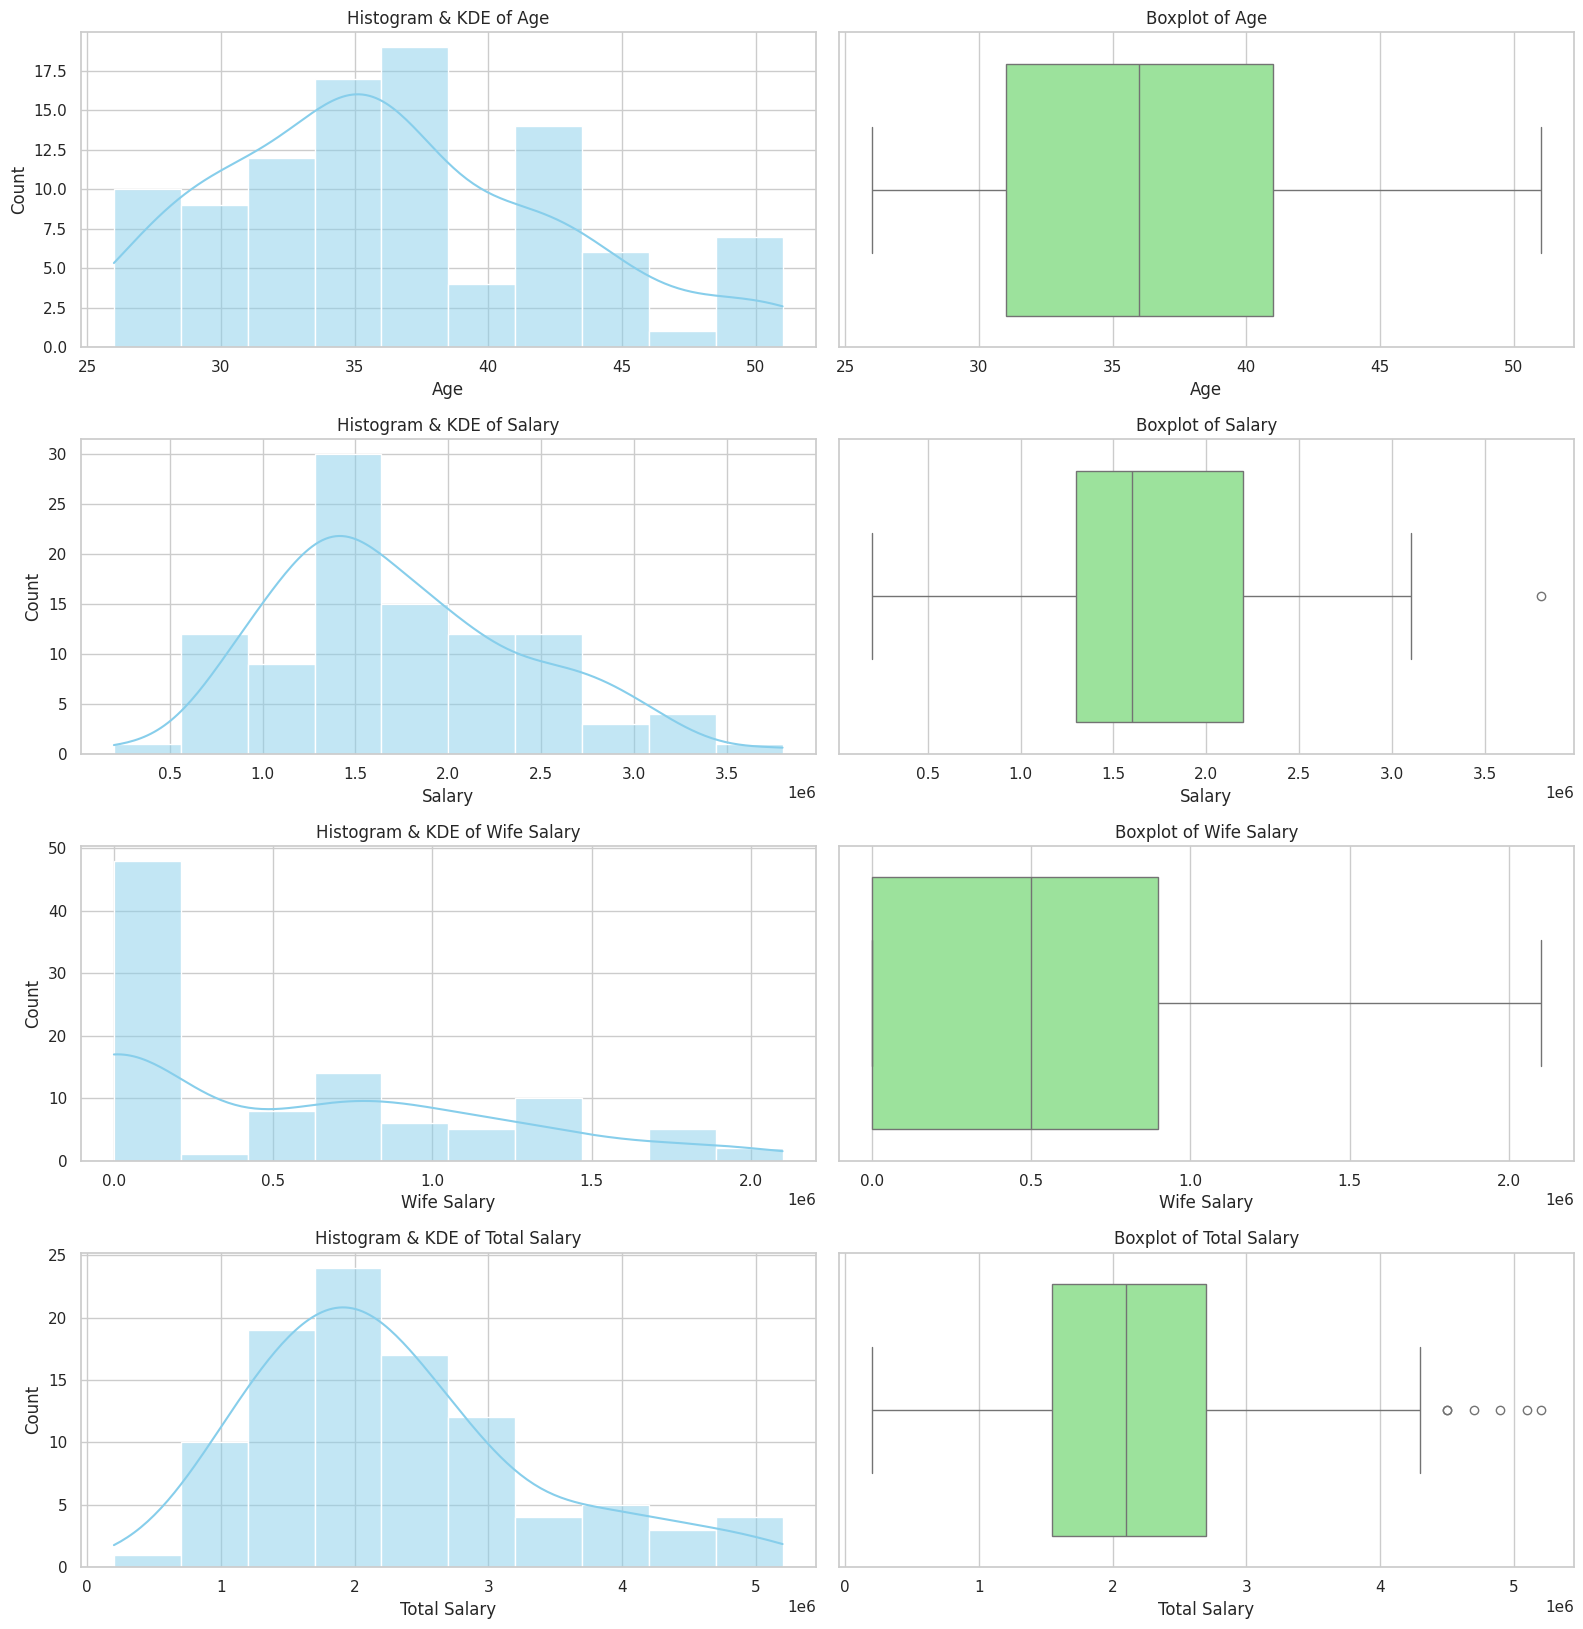

In [5]:
#exploratory data analysis

# Set up plotting aesthetics
sns.set(style="whitegrid")
plt.figure(figsize=(16, 20))
for i, col in enumerate(numeric_features, 1):
    plt.subplot(5, 2, 2*i - 1)
    sns.histplot(df[col], kde=True, bins=10, color='skyblue')
    plt.title(f'Histogram & KDE of {col}')

    plt.subplot(5, 2, 2*i)
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

/tmp/ipython-input-6-3727365736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')
/tmp/ipython-input-6-3727365736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')
/tmp/ipython-input-6-3727365736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='Set2')
/tmp/ipython-input-6-3727365736.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the s

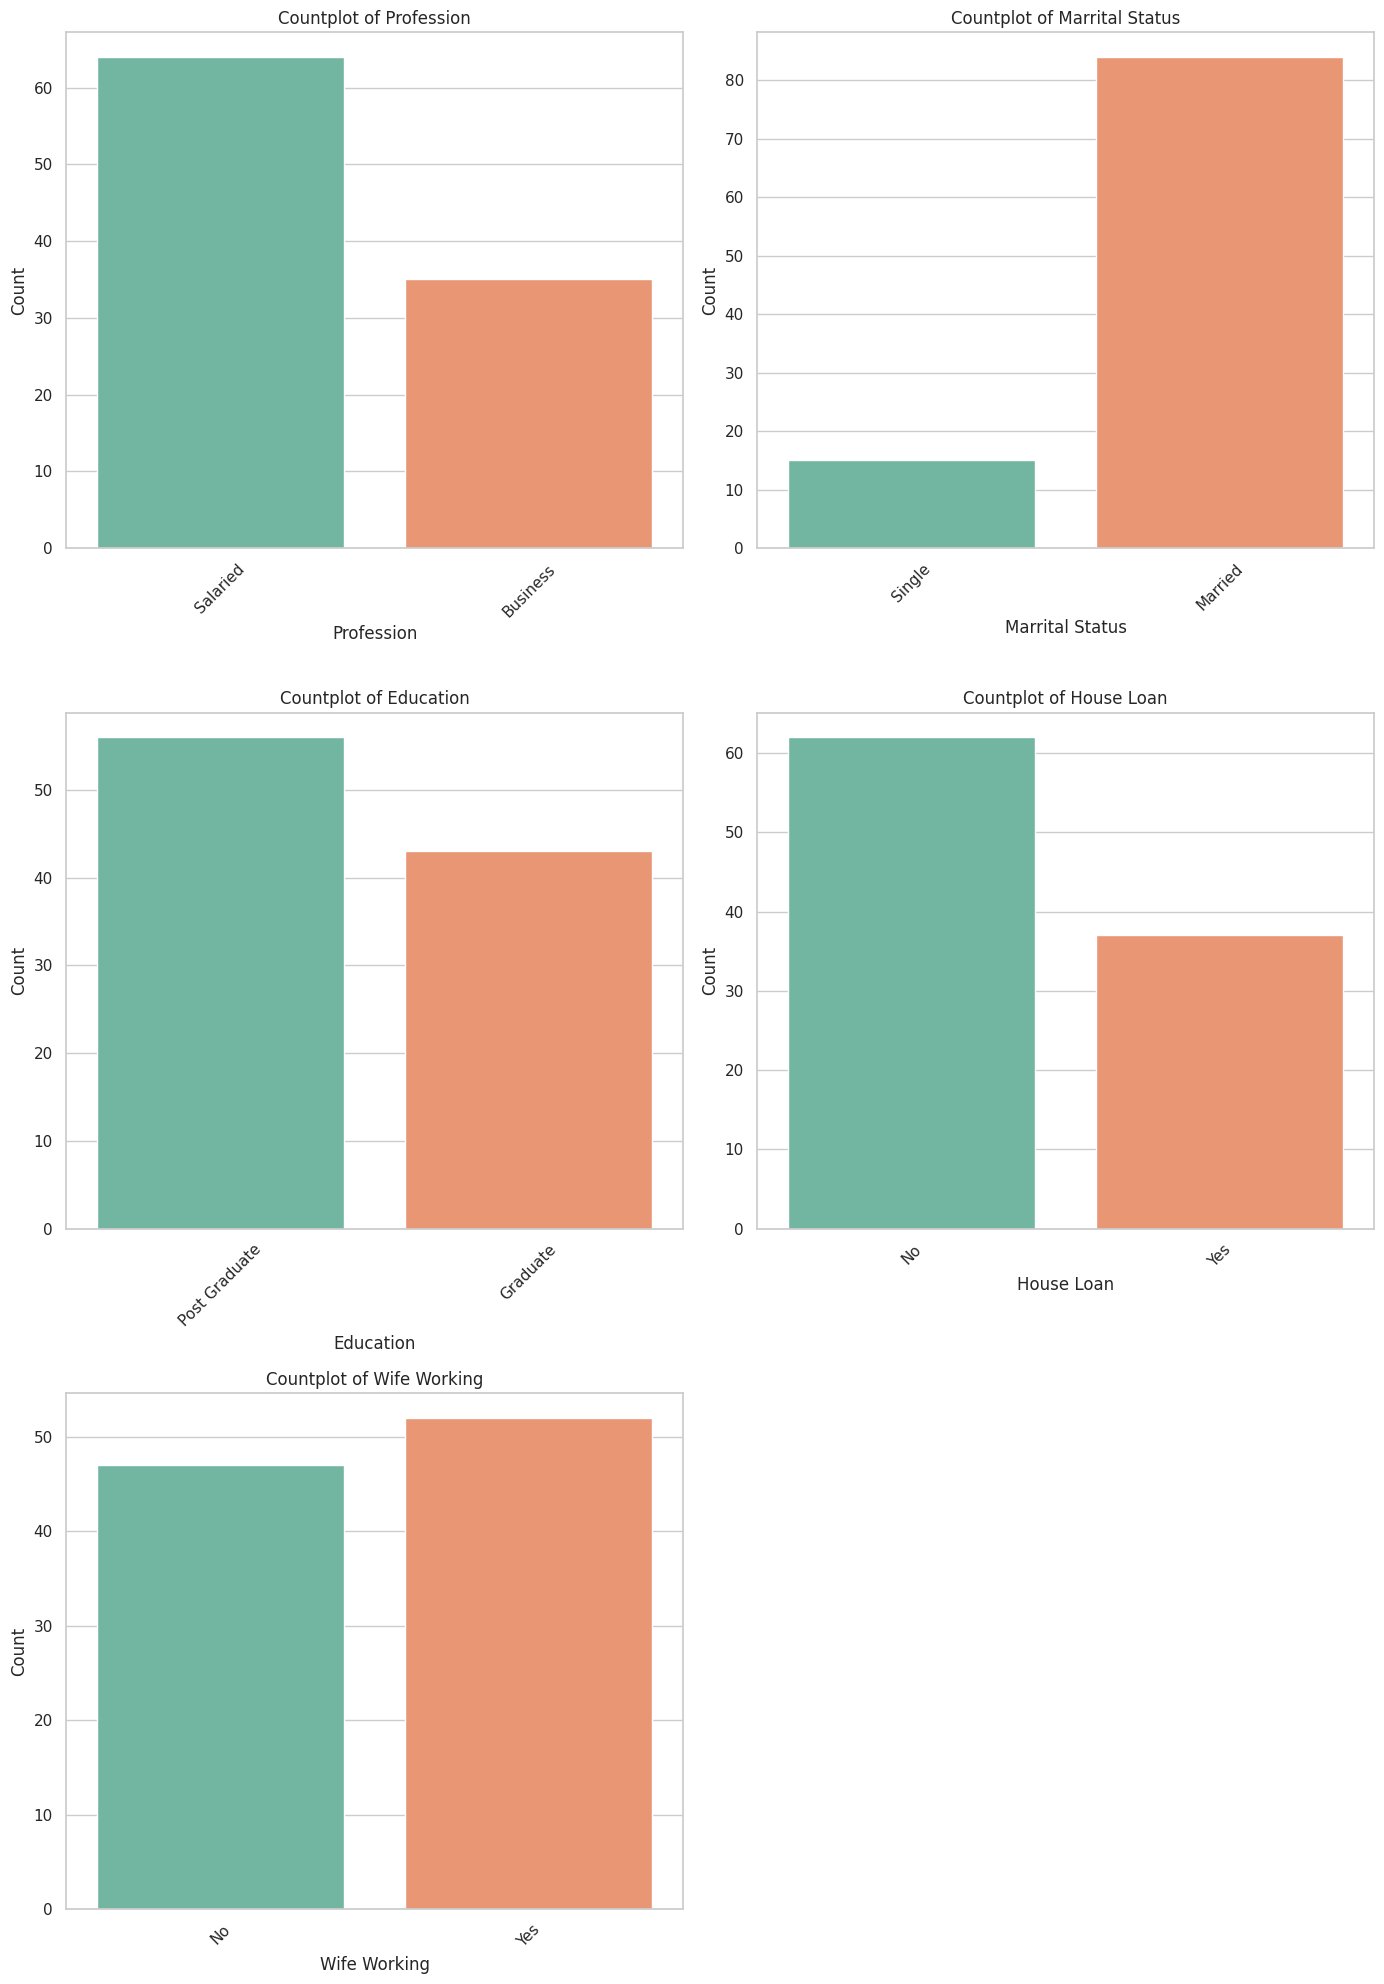

In [6]:
plt.figure(figsize=(14, 20))
for i, col in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(x=df[col], palette='Set2')
    plt.title(f'Countplot of {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

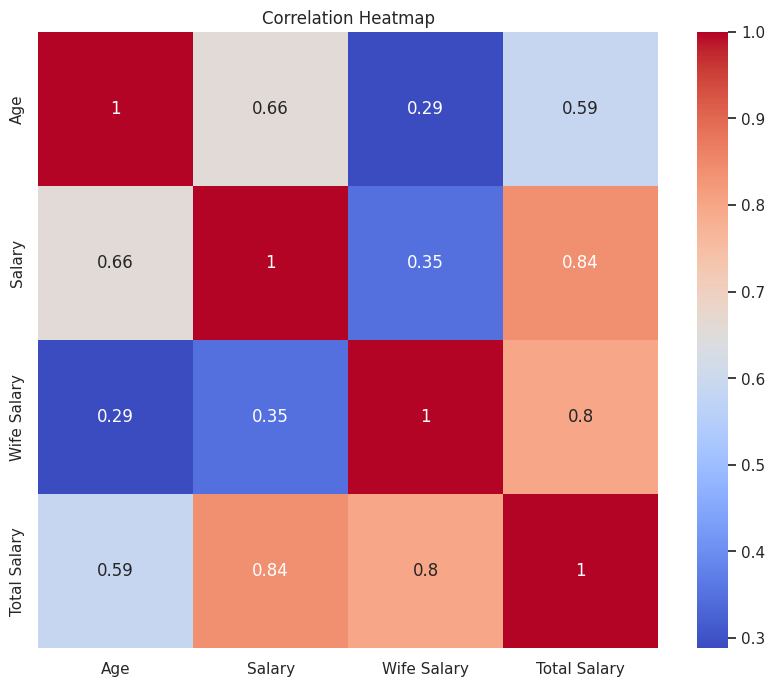

In [7]:
corr = df[numeric_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [9]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

In [10]:
X = preprocessor.fit_transform(df)
sse = []
silhouette_scores = []
range_n_clusters = range(2, 11)

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

Text(0, 0.5, 'SSE')

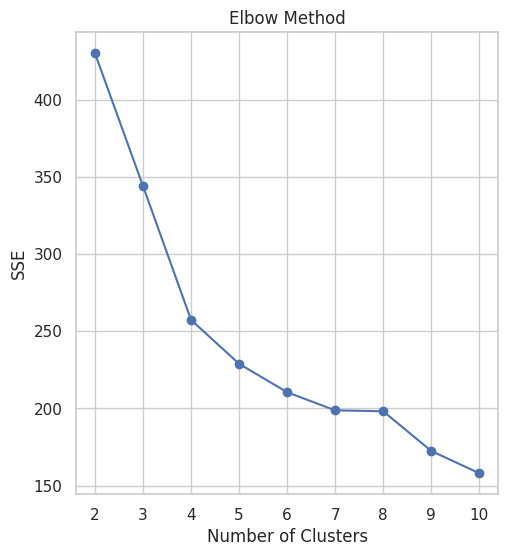

In [11]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

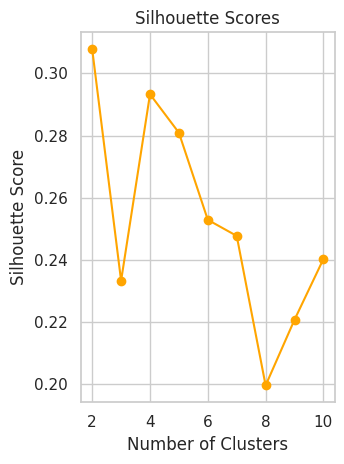

In [12]:
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.tight_layout()
plt.show()

In [13]:
optimal_clusters = 4
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
df['Segment'] = kmeans.fit_predict(X)

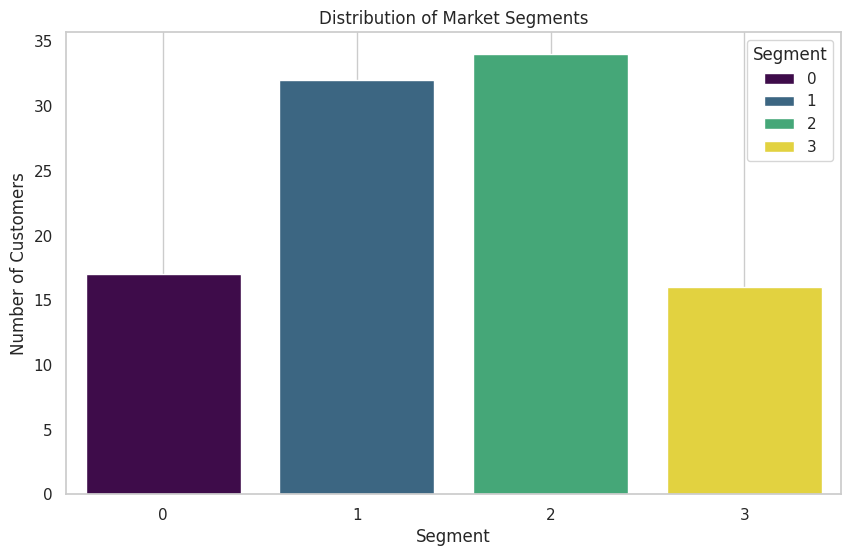

In [14]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Segment', data=df, palette='viridis', hue="Segment")
plt.title('Distribution of Market Segments')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.grid()
plt.show()

In [15]:
centers = kmeans.cluster_centers_
numerical_centers = centers[:, :len(numeric_features)]  # Get the numerical part of the centers
scaler = StandardScaler().fit(X[:, :len(numeric_features)])  # Fit scaler on original numeric features
numerical_centers = scaler.inverse_transform(numerical_centers)
categorical_centers = centers[:, len(numeric_features):]  # Get the categorical part of the centers
categorical_feature_names = preprocessor.named_transformers_['cat']['onehot'].get_feature_names_out(categorical_features)
categorical_centers_df = pd.DataFrame(categorical_centers, columns=categorical_feature_names)
combined_centers = pd.DataFrame(numerical_centers, columns=numeric_features)
center_df = pd.concat([combined_centers, categorical_centers_df], axis=1)

In [16]:
center_df['Segment'] = range(optimal_clusters)
center_df

,Age,Salary,Wife Salary,Total Salary,Profession_Business,Profession_Salaried,Marrital Status_Married,Marrital Status_Single,Education_Graduate,Education_Post Graduate,House Loan_No,House Loan_Yes,Wife Working_No,Wife Working_Yes,Segment
0,0.886710,1.235943,1.671427,1.755381,0.176471,0.823529,1.00000,0.000000e+00,0.294118,0.705882,0.529412,0.470588,-1.110223e-16,1.000000e+00,0
1,-0.734280,-0.581143,-0.887055,-0.883663,0.500000,0.500000,0.53125,4.687500e-01,0.437500,0.562500,0.781250,0.218750,9.687500e-01,3.125000e-02,1
2,-0.310693,-0.536985,0.416599,-0.104205,0.352941,0.647059,1.00000,5.551115e-17,0.500000,0.500000,0.676471,0.323529,3.330669e-16,1.000000e+00,2
3,1.186653,0.990190,-0.887055,0.123671,0.250000,0.750000,1.00000,0.000000e+00,0.437500,0.562500,0.312500,0.687500,1.000000e+00,1.110223e-16,3


In [17]:
top_features = center_df.set_index('Segment').T.apply(lambda x: x.sort_values(ascending=False).head(3))
top_features

Segment,0,1,2,3
Age,NaN,NaN,NaN,1.186653
Education_Post Graduate,NaN,0.56250,NaN,NaN
House Loan_No,NaN,0.78125,0.676471,NaN
Marrital Status_Married,NaN,NaN,1.000000,1.000000
Salary,1.235943,NaN,NaN,NaN
Total Salary,1.755381,NaN,NaN,NaN
Wife Salary,1.671427,NaN,NaN,NaN
Wife Working_No,NaN,0.96875,NaN,1.000000
Wife Working_Yes,NaN,NaN,1.000000,NaN


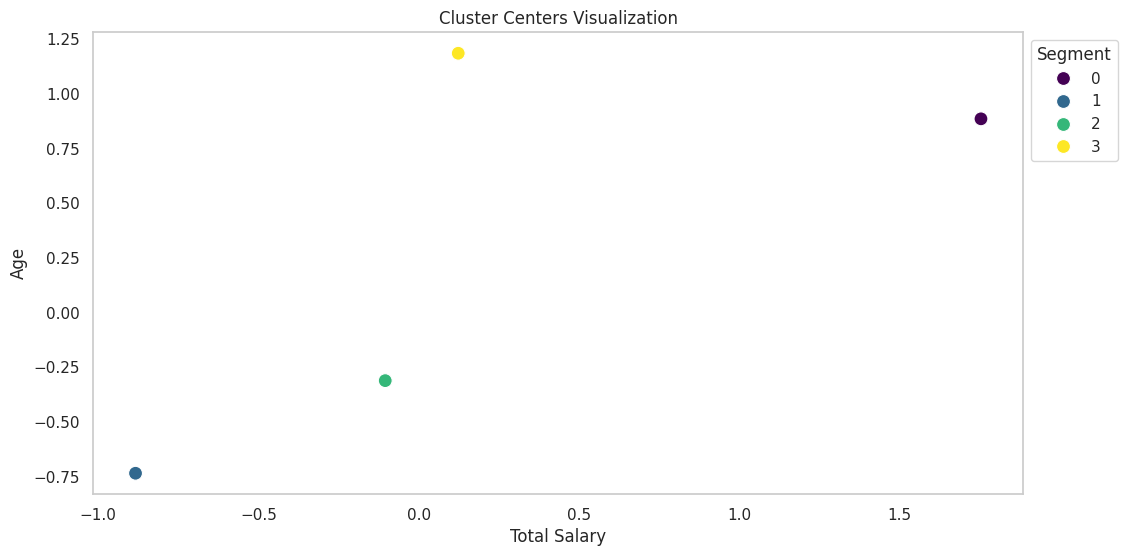

In [18]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=center_df, x='Total Salary', y='Age', hue='Segment', palette='viridis', s=100)
plt.title('Cluster Centers Visualization')
plt.xlabel('Total Salary')
plt.ylabel('Age')
plt.grid()
plt.legend(title='Segment', bbox_to_anchor=(1, 1), loc='upper left')
plt.show()

In [19]:
df.groupby('Segment').describe(include='all')

Age                                                                 \
        count unique top freq       mean       std   min    25%   50%    75%   
Segment                                                                        
0        17.0    NaN NaN  NaN  41.823529  5.615106  34.0  37.00  41.0  45.00   
1        32.0    NaN NaN  NaN  31.750000  4.142619  26.0  28.00  31.0  35.00   
2        34.0    NaN NaN  NaN  34.382353  3.357621  29.0  31.00  35.0  36.00   
3        16.0    NaN NaN  NaN  43.687500  3.961797  37.0  41.75  42.5  45.25   

         ...  Price                                                   \
         ... unique top freq          mean            std        min   
Segment  ...                                                           
0        ...    NaN NaN  NaN  1.717647e+06  485071.250073  1500000.0   
1        ...    NaN NaN  NaN  9.250000e+05  297299.675032   700000.0   
2        ...    NaN NaN  NaN  1.200294e+06  361733.916056   110000.0   
3        ...    NaN NaN  NaN  1.162500e+06  252652.594155   700000.0   

                                                     
               25%        50%        75%        max  
Segment                                              
0        1500000.0  1600000.0  1600000.0  3000000.0  
1         700000.0   800000.0  1100000.0  1600000.0  
2        1025000.0  1200000.0  1500000.0  1600000.0  
3        1100000.0  1150000.0  1300000.0  1600000.0  

[4 rows x 143 columns]

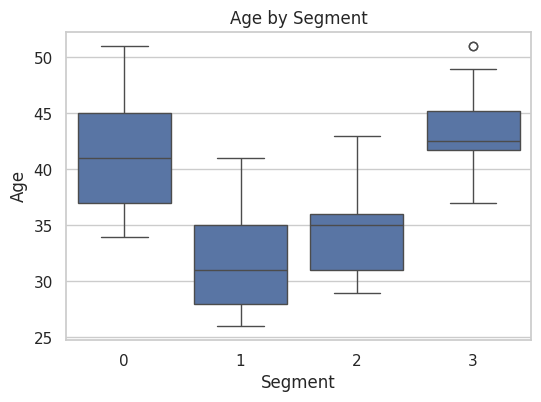

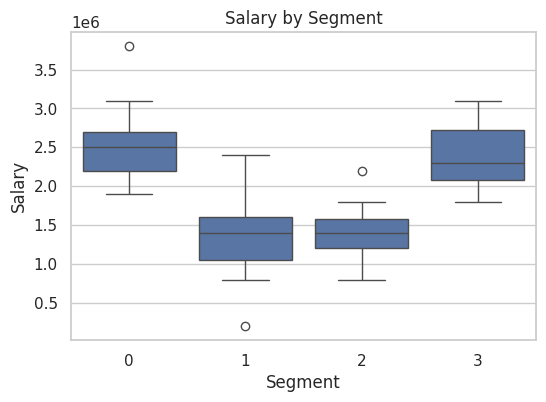

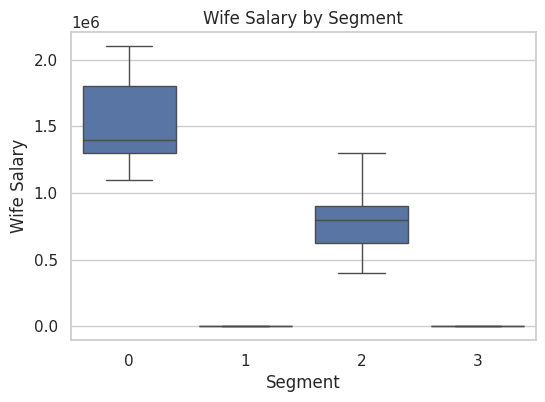

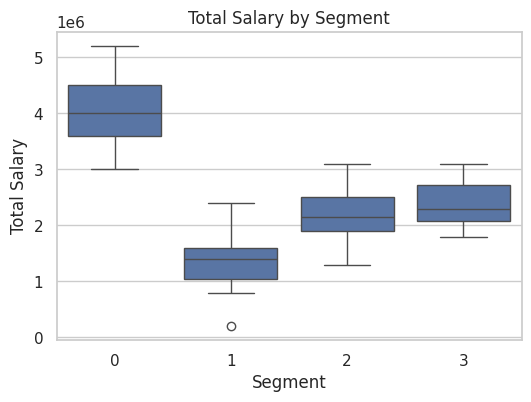

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Segment', y=col, data=df)
    plt.title(f'{col} by Segment')
    plt.show()

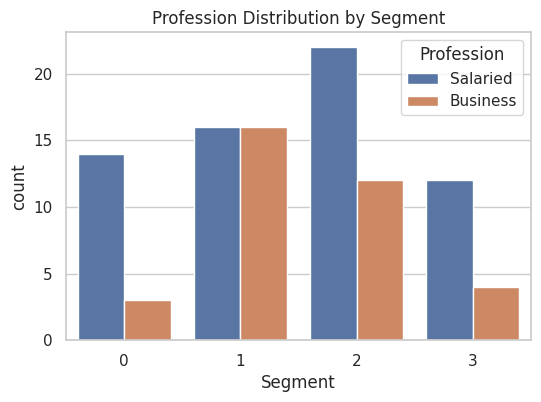

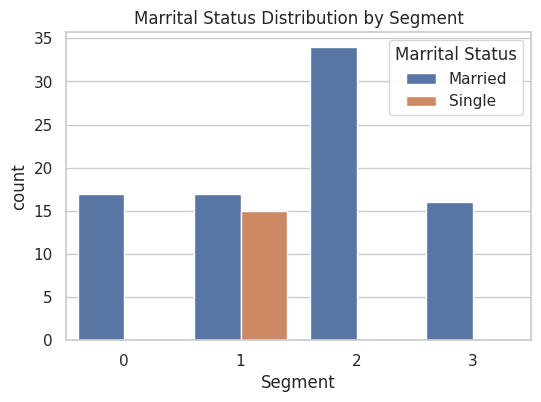

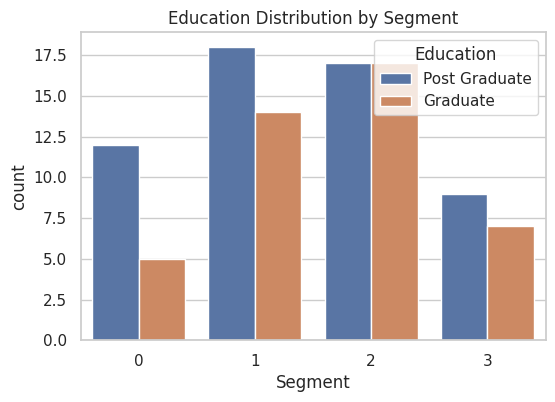

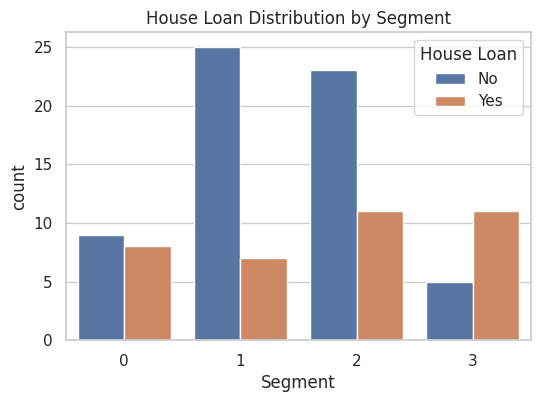

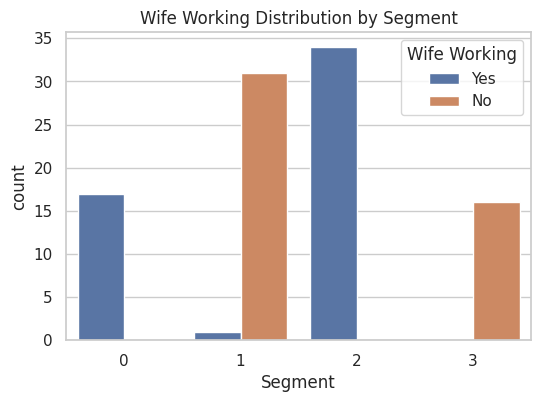

In [21]:
for col in categorical_features:
    plt.figure(figsize=(6, 4))
    sns.countplot(x='Segment', hue=col, data=df)
    plt.title(f'{col} Distribution by Segment')
    plt.show()

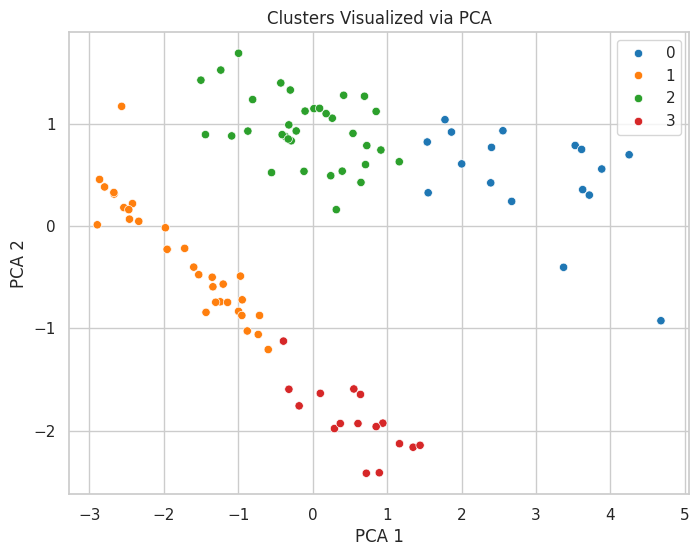

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray() if hasattr(X, 'toarray') else X)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=kmeans.labels_, palette='tab10')
plt.title('Clusters Visualized via PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


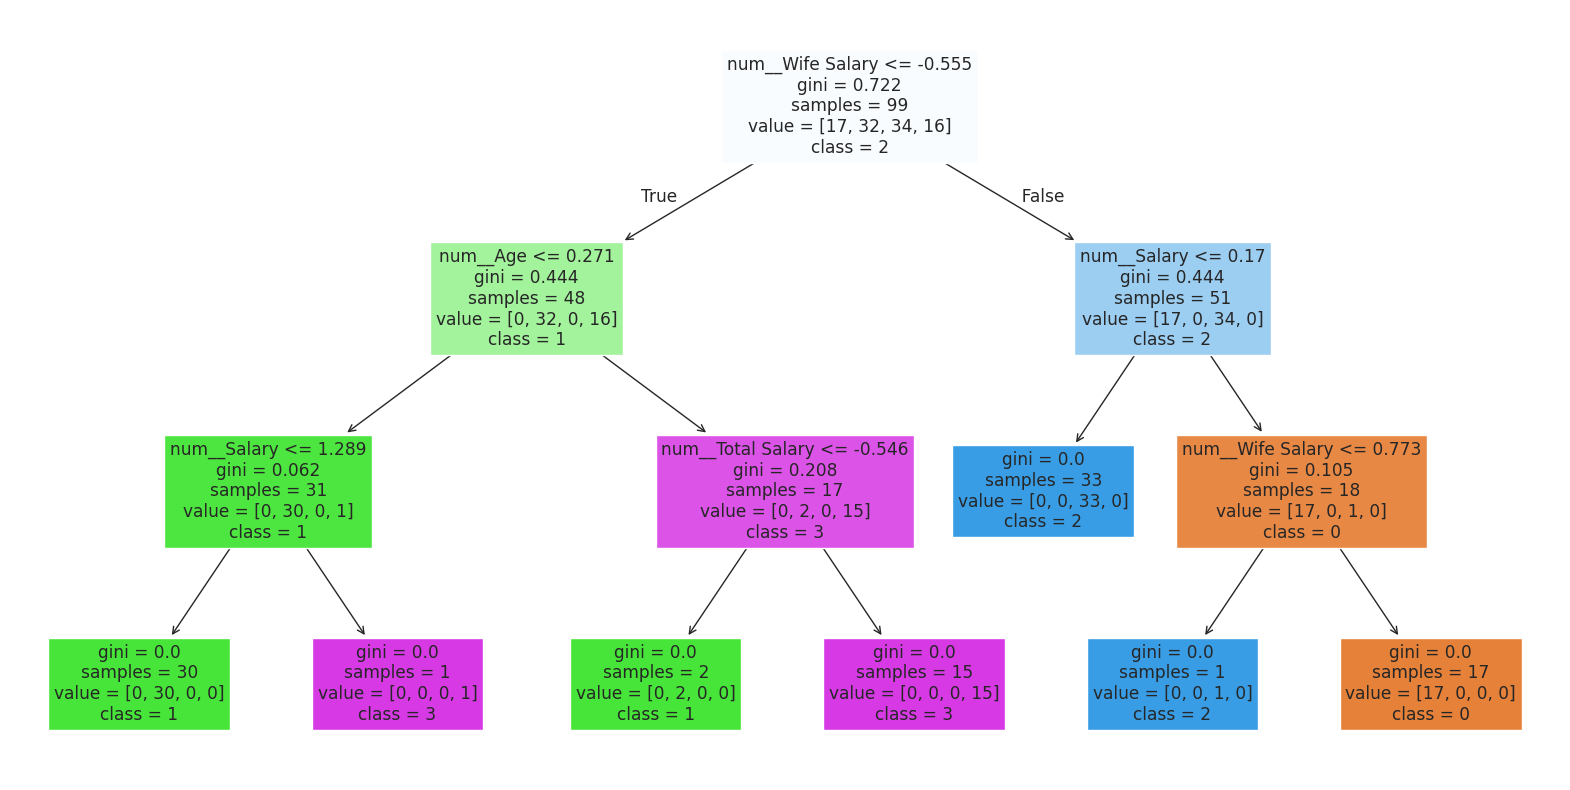

In [23]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X, kmeans.labels_)

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=preprocessor.get_feature_names_out(), class_names=[str(i) for i in range(kmeans.n_clusters)], filled=True)
plt.show()


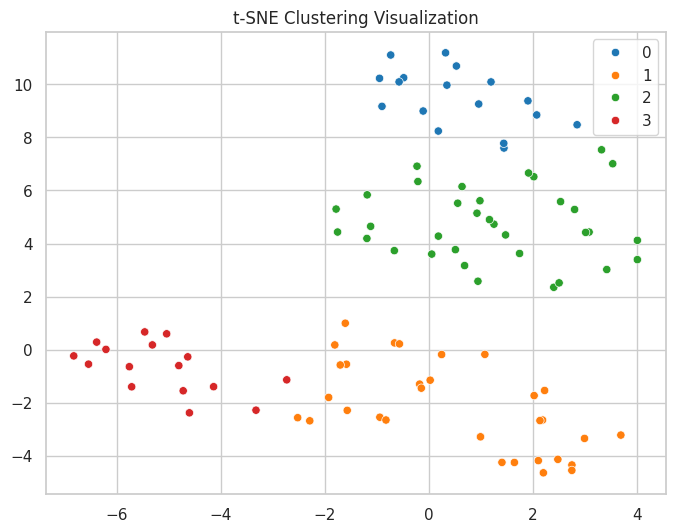

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, random_state=0)
X_tsne = tsne.fit_transform(X.toarray() if hasattr(X, 'toarray') else X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=kmeans.labels_, palette='tab10')
plt.title('t-SNE Clustering Visualization')
plt.show()


In [25]:
for i in range(kmeans.n_clusters):
    df[df['Segment'] == i].to_csv(f'segment_{i}.csv', index=False)